# 0. Magic

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data

เราจะสมมติข้อมูล อายุ น้ำหนัก ส่วนสูง ของ เด็กนักเรียนมัธยมขึ้นมา

In [3]:
df = pd.DataFrame({'Name': ["Student A", "Student B", "Student C", "Student D", "Student E", "Student F"], 
                   'Age': [12, 13, 10, 11, 12, 11], 
                   'Height': [100, 110, 140, 115, 90, 100], 
                   'Weight': [34, 32, 44, 38, 60, 50], 
                   })
df

Name  Age  Height  Weight
0  Student A   12     100      34
1  Student B   13     110      32
2  Student C   10     140      44
3  Student D   11     115      38
4  Student E   12      90      60
5  Student F   11     100      50

ประกาศฟังก์ชัน เอาไว้พล็อตกราฟ

In [0]:
def plot_dist(y, ylabel, yp, yplabel):
    fig,ax = plt.subplots(figsize=(9, 9))
    ax.plot(range(len(y)), y, label=ylabel)
    ax.plot(range(len(y)), yp, label=yplabel)
    ax.grid(True)
    ax.legend(loc='upper right')

# 3. Preprocessing

## 3.1 Min-Max Normalization

เราจะสร้าง Column ใหม่ ชื่อว่า Age_P (Age PreProcess) 

In [5]:
df["Age_P"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())
df

Name  Age  Height  Weight     Age_P
0  Student A   12     100      34  0.666667
1  Student B   13     110      32  1.000000
2  Student C   10     140      44  0.000000
3  Student D   11     115      38  0.333333
4  Student E   12      90      60  0.666667
5  Student F   11     100      50  0.333333

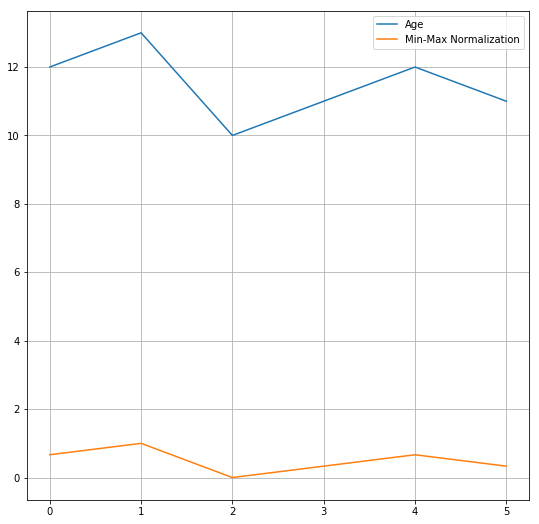

In [6]:
plot_dist(df["Age"].to_numpy(), "Age", df["Age_P"].to_numpy(), "Min-Max Normalization")

## 3.2 Mean Normalization

In [7]:
df["Height_P"] = (df["Height"] - df["Height"].mean()) / (df["Height"].max() - df["Height"].min())
df

Name  Age  Height  Weight     Age_P  Height_P
0  Student A   12     100      34  0.666667 -0.183333
1  Student B   13     110      32  1.000000  0.016667
2  Student C   10     140      44  0.000000  0.616667
3  Student D   11     115      38  0.333333  0.116667
4  Student E   12      90      60  0.666667 -0.383333
5  Student F   11     100      50  0.333333 -0.183333

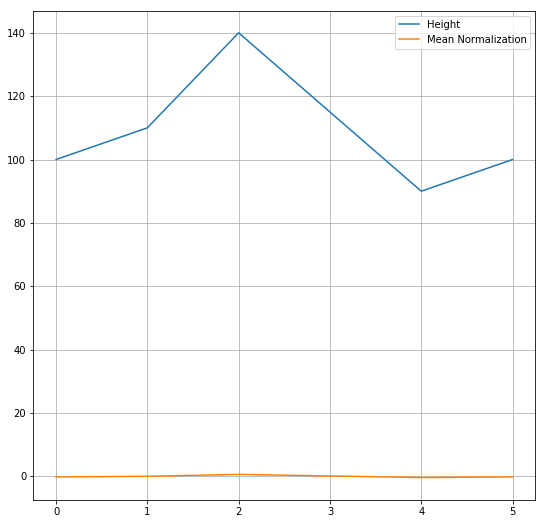

In [8]:
plot_dist(df["Height"].to_numpy(), "Height", df["Height_P"].to_numpy(), "Mean Normalization")

## 3.3 Standardization

In [9]:
df["Weight_P"] = (df["Weight"] - df["Weight"].mean()) / df["Weight"].std()
df

Name  Age  Height  Weight     Age_P  Height_P  Weight_P
0  Student A   12     100      34  0.666667 -0.183333 -0.845901
1  Student B   13     110      32  1.000000  0.016667 -1.033878
2  Student C   10     140      44  0.000000  0.616667  0.093989
3  Student D   11     115      38  0.333333  0.116667 -0.469945
4  Student E   12      90      60  0.666667 -0.383333  1.597812
5  Student F   11     100      50  0.333333 -0.183333  0.657923

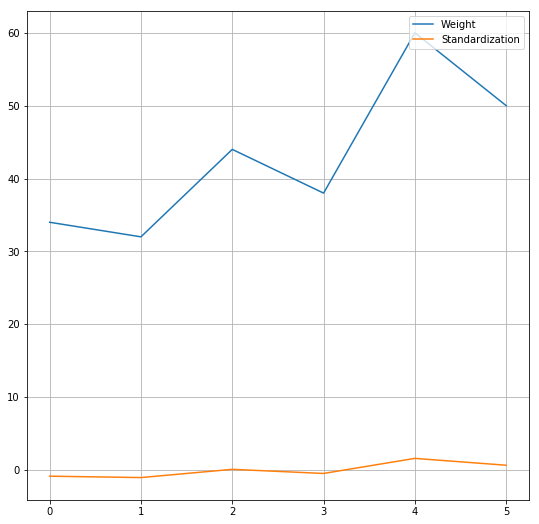

In [10]:
plot_dist(df["Weight"].to_numpy(), "Weight", df["Weight_P"].to_numpy(), "Standardization")

# 4. สรุป

เรานำทั้งหมดมาพล็อตรวมได้ดังนี้ สังเกตช่วง [0, 1], [-0.5, 0.5] และ [-1, 1]

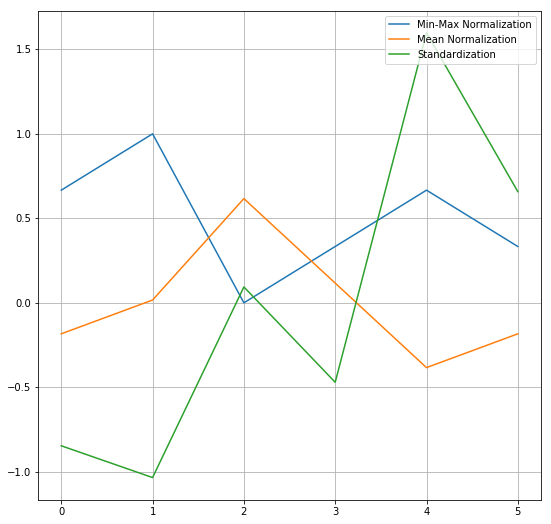

In [11]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.plot(range(len(df)), df["Age_P"].to_numpy(), label="Min-Max Normalization")
ax.plot(range(len(df)), df["Height_P"].to_numpy(), label="Mean Normalization")
ax.plot(range(len(df)), df["Weight_P"].to_numpy(), label="Standardization")
ax.grid(True)
ax.legend(loc='upper right')

เปรียบเทียบกับก่อน Preprocessing จะเห็นว่าคนละ Scale กันเลย

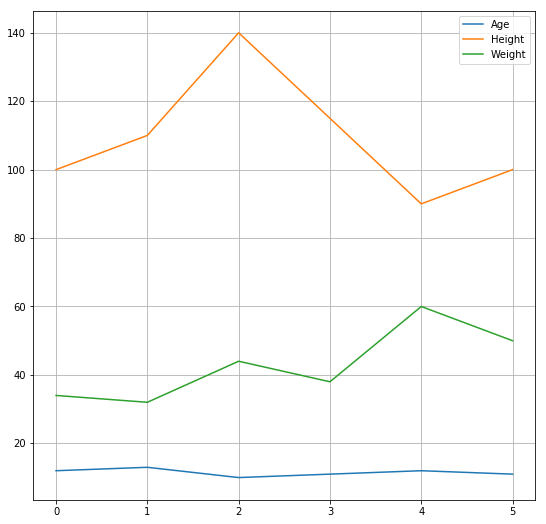

In [12]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.plot(range(len(df)), df["Age"].to_numpy(), label="Age")
ax.plot(range(len(df)), df["Height"].to_numpy(), label="Height")
ax.plot(range(len(df)), df["Weight"].to_numpy(), label="Weight")
ax.grid(True)
ax.legend(loc='upper right')